# Downoad the [Data](https://www.kaggle.com/competitions/rsna-2024-lumbar-spine-degenerative-classification/data) from Kaggle:




In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload the kaggle.json file here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sgautam3","key":"c678e06d3351821a7a83a9dcd9bda9b3"}'}

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle competitions download -c rsna-2024-lumbar-spine-degenerative-classification

100% 28.2G/28.2G [05:48<00:00, 125MB/s] 
100% 28.2G/28.2G [05:48<00:00, 87.0MB/s]


In [ ]:
!unzip rsna-2024-lumbar-spine-degenerative-classification.zip -d /content/data/

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/train_images/885894528/2509467535/43.dcm  
  inflating: /content/data/train_images/885894528/2509467535/44.dcm  
  inflating: /content/data/train_images/885894528/2509467535/45.dcm  
  inflating: /content/data/train_images/885894528/2509467535/46.dcm  
  inflating: /content/data/train_images/885894528/2509467535/47.dcm  
  inflating: /content/data/train_images/885894528/2509467535/48.dcm  
  inflating: /content/data/train_images/885894528/2509467535/49.dcm  
  inflating: /content/data/train_images/885894528/2509467535/5.dcm  
  inflating: /content/data/train_images/885894528/2509467535/50.dcm  
  inflating: /content/data/train_images/885894528/2509467535/6.dcm  
  inflating: /content/data/train_images/885894528/2509467535/7.dcm  
  inflating: /content/data/train_images/885894528/2509467535/8.dcm  
  inflating: /content/data/train_images/885894528/2509467535/9.dcm  
  inflating: /content/data/train_images/8858

In [ ]:
!rm /content/rsna-2024-lumbar-spine-degenerative-classification.zip

# Data Visualisation

In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 34.7 MB/s eta 0:00:00


In [ ]:
import pydicom
import matplotlib.pyplot as plt

In [ ]:
# visualise the 'dcm' file that from train_images
file_path = '/content/data/train_images/100206310/1012284084/1.dcm'
ds = pydicom.dcmread(file_path)
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()

In [ ]:
train = pd.read_csv('/content/data/train.csv')

In [ ]:
len(train) # number of studies

Total Cases:  1975


In [ ]:
train.columns

Index(['study_id', 'spinal_canal_stenosis_l1_l2',
       'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4',
       'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1',
       'left_neural_foraminal_narrowing_l1_l2',
       'left_neural_foraminal_narrowing_l2_l3',
       'left_neural_foraminal_narrowing_l3_l4',
       'left_neural_foraminal_narrowing_l4_l5',
       'left_neural_foraminal_narrowing_l5_s1',
       'right_neural_foraminal_narrowing_l1_l2',
       'right_neural_foraminal_narrowing_l2_l3',
       'right_neural_foraminal_narrowing_l3_l4',
       'right_neural_foraminal_narrowing_l4_l5',
       'right_neural_foraminal_narrowing_l5_s1',
       'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3',
       'left_subarticular_stenosis_l3_l4', 'left_subarticular_stenosis_l4_l5',
       'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2',
       'right_subarticular_stenosis_l2_l3',
       'right_subarticular_stenosis_l3_l4',
 

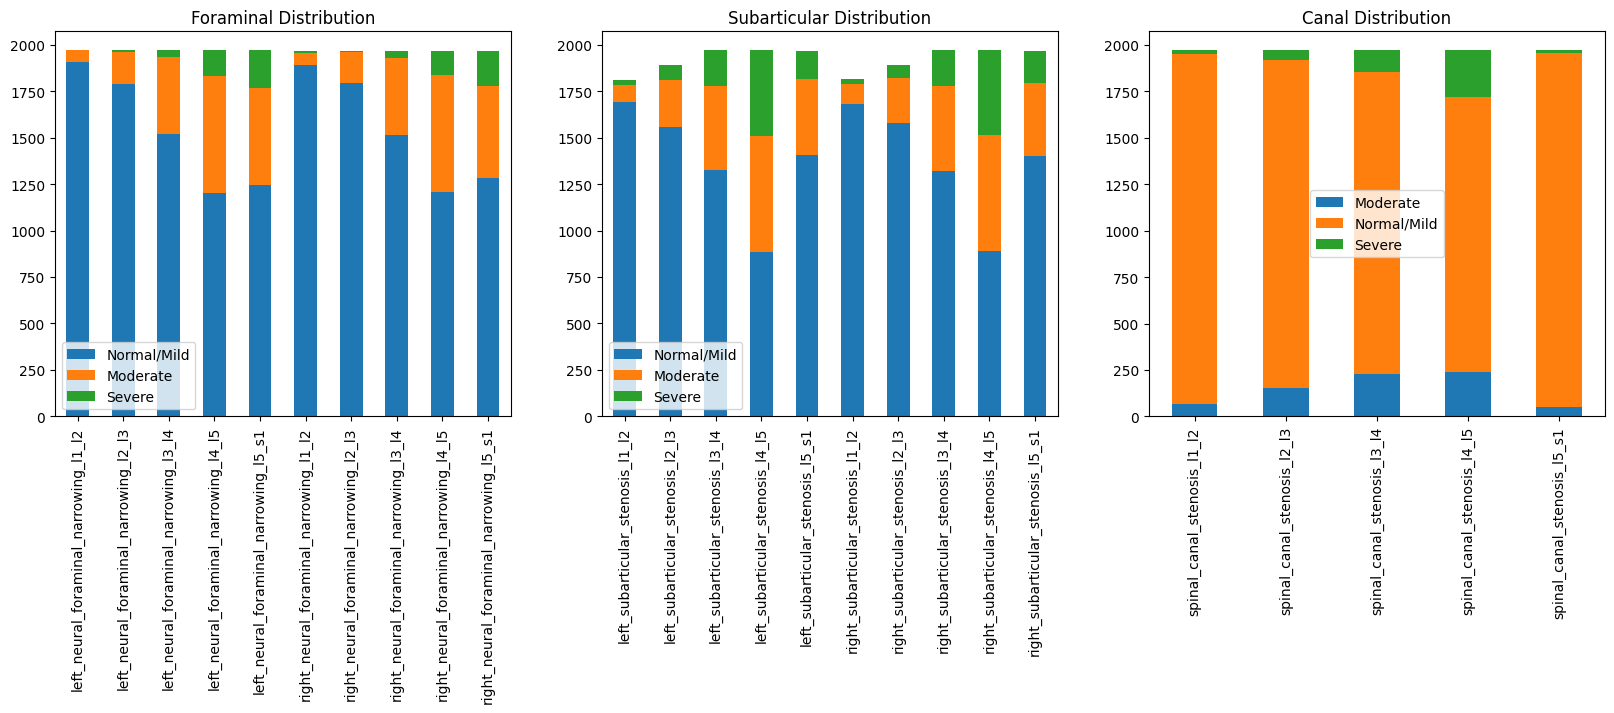

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# The three categories we want to look at
categories = ['foraminal', 'subarticular', 'canal']

# Go through each category one by one
for i in range(3):
    category = categories[i]  # Get the current category

    columns = [col for col in train.columns if category in col]

    data_subset = train[columns]

    counts = data_subset.apply(pd.Series.value_counts).fillna(0).T

    # Plot the counts as a stacked bar chart in the appropriate subplot
    counts.plot(kind='bar', stacked=True, ax=axes[i])

    axes[i].set_title(f'{category.capitalize()} Distribution')

plt.show()


# Extract subset of the data



Extract the AxialT2 series_id form train_series_descriptions.csv

In [ ]:
import pandas as pd

# Load the CSV file
train_df = pd.read_csv('/content/train_series_descriptions.csv')

# Filter the DataFrame to keep only rows where 'SeriesDescription' is 'Axial T2'
axial_t2_df = train_df[train_df['series_description'] == 'Axial T2']

# Save the filtered DataFrame to a new CSV file
axial_t2_df.to_csv('/content/train_series_descriptions_AxialT2.csv', index=False)

extract only the canal_stenosis images

In [ ]:
train_df = pd.read_csv('/content/train.csv')

# keeping columns starting with "left_subarticular_stenosis" or "right_subarticular_stenosis"
selected_columns = [col for col in train_df.columns if col.startswith('left_subarticular_stenosis') or col.startswith('right_subarticular_stenosis') or col.startswith('study_id')]
new_df = train_df[selected_columns]

# Save the new DataFrame to a CSV file
new_df.to_csv('train_AxialT2.csv', index=False)

Clean the data and drop empty entries.



In [ ]:
train_df = pd.read_csv('train_AxialT2.csv')

# Drop rows with any empty cells
train_df.dropna(inplace=True)

# Save the modified DataFrame back to the CSV file
train_df.to_csv('train_AxialT2_filter.csv', index=False)

Merge the 2 csv to bring all the relevant information in one csv and get label for each 'series_id'.

In [ ]:
train_axial_t2 = pd.read_csv('train_AxialT2_filter.csv')
train_series_descriptions = pd.read_csv('train_series_descriptions_AxialT2.csv')

# Merge the two DataFrames based on 'study_id'
merged_df = pd.merge(train_axial_t2, train_series_descriptions[['study_id', 'series_id']], on='study_id', how='left')

# Reorder columns to place 'series_id' immediately after 'study_id'
cols = list(merged_df.columns)
study_id_index = cols.index('study_id')
cols.insert(study_id_index + 1, cols.pop(cols.index('series_id')))
merged_df = merged_df[cols]

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('AxialT2_data.csv', index=False)

In [ ]:
# Load the CSV files
axial_t2_data = pd.read_csv('AxialT2_data.csv')
train_labels = pd.read_csv('train_label_Left_Subarticular_L4_L5.csv')

# Extract the relevant column from axial_t2_data
left_subarticular_stenosis = axial_t2_data['left_subarticular_stenosis_l4_l5']

# Merge the two dataframes on 'series_id'
merged_df = pd.merge(train_labels, axial_t2_data[['series_id', 'left_subarticular_stenosis_l4_l5']], on='series_id', how='left')

# Fill the 'severity' column in train_labels based on the merged data
train_labels['severity'] = merged_df['left_subarticular_stenosis_l4_l5']

# Save the updated train_labels DataFrame
train_labels.to_csv('train_label_AxialT2_Data.csv', index=False)

Check for any empty entries.

In [ ]:
# Load the CSV file
train_label_AxialT2_Data = pd.read_csv('train_label_AxialT2_Data.csv')

# Delete rows where 'severity' is empty
train_label_AxialT2_Data = train_label_AxialT2_Data.dropna(subset=['severity'])

# Save the modified DataFrame to a new CSV file
train_label_AxialT2_Data.to_csv('AxialT2_labels_left_l4_5.csv', index=False)

Finally we have a csv file that has all the labeld relaent data (AxialT2 images for canal_stenosis and level l4_5 with the labeled severity)

# Data Preprocessing

Now I need to extract the relavant data from the dataset and segregate them in their respective folders/classes (Normal,Moderate,Severe) with the help of 'AxialT2_labels_left_l4_5.csv' that I created above.

In [ ]:
# Create the main directory and subdirectories
base_dir = '/content/AxialT2_left_l4_5_data_roi'
os.makedirs(base_dir, exist_ok=True)
subdirs = ['Normal', 'Moderate', 'Severe']
for subdir in subdirs:
    os.makedirs(os.path.join(base_dir, subdir), exist_ok=True)


Here I extract the ROI(region of intrest) from the whole image, resize it (to size 112) and save in the respective directory (Normal, Moderate or Severe). Also coner the dcm fie foramte to png that can make them easy to visualise.


I extracted ROI size the relevnt changes are only in a small area of the whole image, thus to improve the accuracy and make the job of classifier easy I extracted ROI


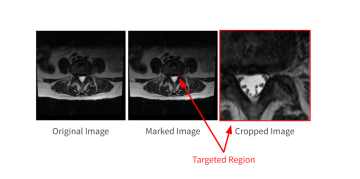

In [ ]:
import pandas as pd
import os
import shutil
from PIL import Image
import pydicom
import cv2
import numpy as np

# Load the CSV file containing image labels and severities
labels_df = pd.read_csv('AxialT2_labels_left_l4_5.csv')

# Define the source and destination directories
source_dir = '/content/data/train_images'
destination_dir = '/content/AxialT2_left_l4_5_data_roi_112'

# Iterate through each row in the labels DataFrame
for index, row in labels_df.iterrows():
    study_id = str(int(row['study_id']))
    series_id = str(int(row['series_id']))
    instance_number = str(int(row['instance_number']))
    severity = row['severity']
    x = int(row['x'])
    y = int(row['y'])

    # Construct the source file path
    image_path = os.path.join(source_dir, study_id, series_id, instance_number + '.dcm')

    # Determine the destination subdirectory based on severity
    if severity == 'Normal/Mild':
        destination_subdir = 'Normal'
    else:
        destination_subdir = severity

    # Construct the destination file path
    destination_path = os.path.join(destination_dir, destination_subdir, series_id +"_"+ instance_number + '.png')

    # Create the destination subdirectory if it doesn't exist
    os.makedirs(os.path.dirname(destination_path), exist_ok=True)

    # Copy the image file to the destination directory, handling potential errors
    try:
        if os.path.exists(image_path):
            # Load the DICOM file
            ds = pydicom.dcmread(image_path)

            # Extract the pixel array
            pixel_array = ds.pixel_array

            # Normalize the pixel array to 8-bit (0-255)
            normalized_array = (pixel_array - pixel_array.min()) / (pixel_array.max() - pixel_array.min())
            scaled_array = (normalized_array * 255).astype(np.uint8)

             # Convert the pixel array to a grayscale image
            image = cv2.cvtColor(scaled_array, cv2.COLOR_GRAY2BGR)

            # # Mark a dot on the image
            # cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1)

            # Define the ROI coordinates
            h, w = image.shape[:2]
            h = int((h * 0.25)/2)
            w = int((w * 0.25)/2)

            # Crop the ROI
            roi = image[y-h:y+h, x-w:x+w]
            resized_roi = cv2.resize(roi, (112, 112), interpolation=cv2.INTER_AREA)

            # Ensure the output directory exists
            os.makedirs(os.path.dirname(destination_path), exist_ok=True)

            # Write the PNG file
            # cv2.imwrite(destination_path, image)
            cv2.imwrite(destination_path, resized_roi)

        else:
            print(f"Image file not found: {image_path}")
    except (shutil.SameFileError, OSError) as e:
        print(f"Error copying file {image_path}: {e}")

In [ ]:
!zip -r /content/AxialT2_left_l4_5_data_roi_112.zip /content/AxialT2_left_l4_5_data_roi_112

  adding: content/AxialT2_left_l4_5_data_roi_224/ (stored 0%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/ (stored 0%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/2773479263_19.png (deflated 26%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/6539474_29.png (deflated 17%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/1501150117_9.png (deflated 17%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/1280331258_13.png (deflated 18%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/2034399927_32.png (deflated 30%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/3356302344_24.png (deflated 17%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/3394685819_32.png (deflated 26%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/1835512018_15.png (deflated 19%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/4121293796_36.png (deflated 17%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Mod

# Train classifier models and compare:

In [ ]:
!unzip /content/AxialT2_left_l4_5_data_roi_112_clean.zip

## Binary Classification (Normal and Severe class)



### Classification using CNN:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os

Found 926 images belonging to 2 classes.
Found 230 images belonging to 2 classes.
Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.7005 - loss: 0.5875 - val_accuracy: 0.7304 - val_loss: 0.4613
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.7966 - loss: 0.4472 - val_accuracy: 0.8609 - val_loss: 0.3765
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.8269 - loss: 0.4254 - val_accuracy: 0.8478 - val_loss: 0.3331
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.8293 - loss: 0.4317 - val_accuracy: 0.8696 - val_loss: 0.3233
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.8719 - loss: 0.3292 - val_accuracy: 0.8478 - val_loss: 0.3723
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.8461 - loss: 0.3721 - val_accuracy: 0.8870 - val_loss: 0.2954
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8804 - loss: 0.3111 - val_accuracy: 0.8609 - val_loss: 0.3252
Epoch 8/50
29/29 ━━━━

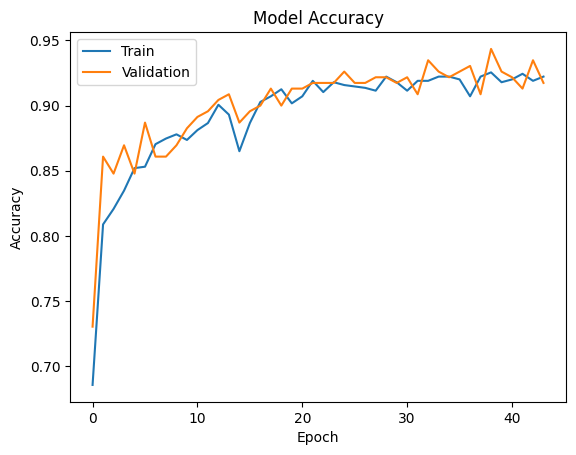

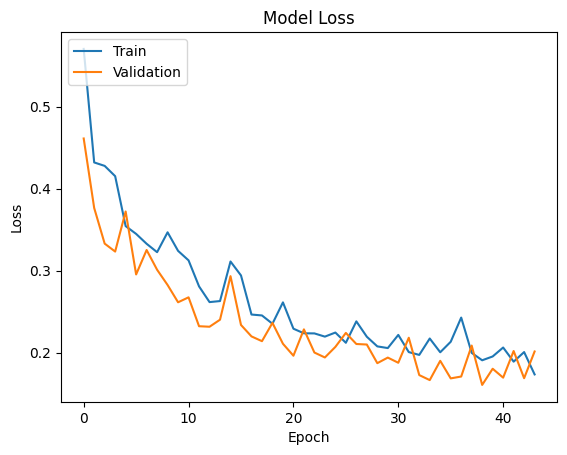

In [ ]:
# Define image dimensions and batch size
img_height, img_width = 112, 112
batch_size = 32

# Define data directories
data_dir = "/content/AxialT2_left_l4_5_data_roi_112_clean"
train_dir = os.path.join(data_dir)
val_dir = os.path.join(data_dir)


# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Set validation split
)

# Rescale validation data
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Use binary for two classes
    subset='training',
    classes=['Normal','Severe']
)

# Create validation data generator
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    classes=['Normal','Severe']
)

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy loss
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping] # Add early stopping callback
)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The model trained for 44 epochs and got accuracy of 92.82% and a validation accuracy of 91.74%

Lets test our model

In [ ]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


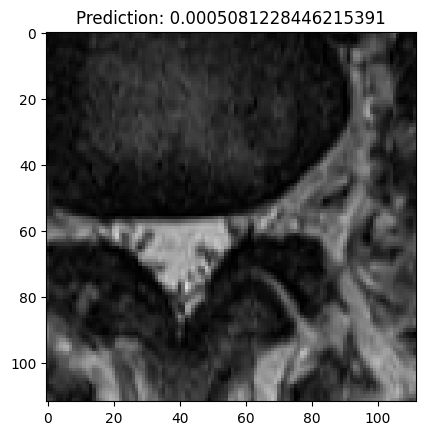

In [20]:
# model = keras.models.load_model("your_model_path.h5")

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
    img = cv2.resize(img, (112, 112))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_on_image(image_path, model):
  img = preprocess_image(image_path)
  prediction = model.predict(img)
  return prediction

# Example usage
# image_path = "/content/AxialT2_left_l4_5_data_roi_112_clean/Normal/1014921752_16.png" # Replace with the actual path of your image
# image_path = "/content/AxialT2_left_l4_5_data_roi_112_clean/Severe/1012284084_46.png" # Replace with the actual path of your image
image_path = "/content/AxialT2_left_l4_5_data_roi_112_clean/Normal/1014921752_16.png"

prediction = predict_on_image(image_path, model)


# Display the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Prediction: {prediction[0][0]}") # Assuming binary classification
plt.show()

Prediction close to 0 means Normal class, which is correct since


Normal class has no gap and severe class has gap:

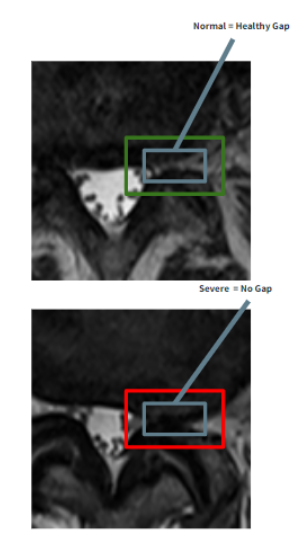

In [ ]:
# Save the CNN model
model.save('/content/CNN.h5')

## Multi Class Classifier (Normal, Moderate and Severe)

### Multi Class Classification using CNN

Found 1370 images belonging to 3 classes.
Found 340 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step - accuracy: 0.4160 - loss: 1.0645 - val_accuracy: 0.4941 - val_loss: 0.9555
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.5141 - loss: 0.9535 - val_accuracy: 0.6147 - val_loss: 0.8487
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.5514 - loss: 0.9159 - val_accuracy: 0.6529 - val_loss: 0.8036
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.5860 - loss: 0.8710 - val_accuracy: 0.6412 - val_loss: 0.8063
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.6098 - loss: 0.8545 - val_accuracy: 0.6588 - val_loss: 0.7944
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.5978 - loss: 0.8259 - val_accuracy: 0.6559 - val_loss: 0.7627
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.5902 - loss: 0.8137 - val_accuracy: 0.6235 - val_loss: 0.7923
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.6077 - loss: 0.7997 - val_accura

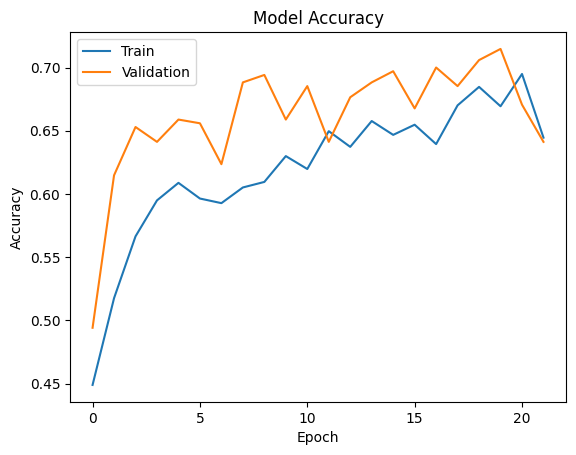

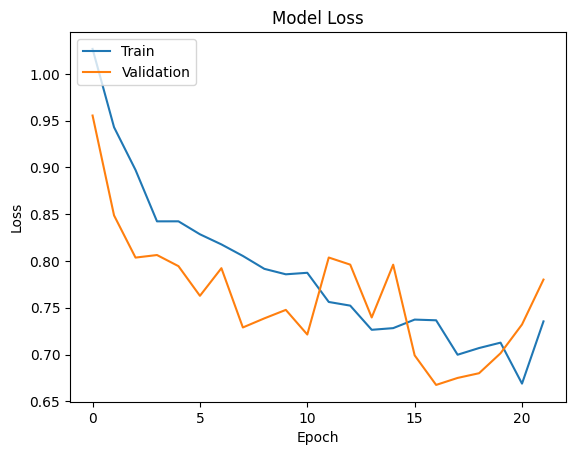

In [ ]:
# Define image dimensions and batch size
img_height, img_width = 112, 112
batch_size = 32

# Define data directories
data_dir = "/content/AxialT2_left_l4_5_data_roi_112_clean"
train_dir = os.path.join(data_dir)
val_dir = os.path.join(data_dir)

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Rescale validation data
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use categorical for multi-class
    subset='training',
    classes=['Normal', 'Moderate', 'Severe'] #Specify all three classes
)

# Create validation data generator
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=['Normal', 'Moderate', 'Severe'] #Specify all three classes
)

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # Softmax for multi-class
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Categorical cross-entropy loss
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The model trained for 22 epochs achived training accuracy of 68.2% and validation accuracy of 64.12%

Lets test the Multi class classifer

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step


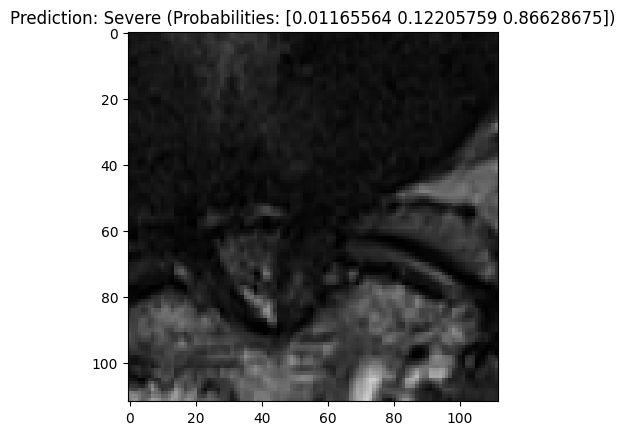

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def preprocess_image_3class(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (img_height, img_width))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_on_image_3class(image_path, model):
    img = preprocess_image_3class(image_path)
    prediction = model.predict(img)
    predicted_class_index = np.argmax(prediction)
    class_labels = ['Normal', 'Moderate', 'Severe'] # Define class labels
    predicted_class = class_labels[predicted_class_index]
    return prediction, predicted_class

# Example usage
image_path = "/content/AxialT2_left_l4_5_data_roi_112_clean/Severe/1012284084_46.png"  # Example path

# Assuming 'model' is your 3-class CNN model (already trained)
prediction, predicted_class = predict_on_image_3class(image_path, model)

# Display the image and prediction
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Prediction: {predicted_class} (Probabilities: {prediction[0]})")
plt.show()

### Denser Network

Found 1370 images belonging to 3 classes.
Found 340 images belonging to 3 classes.
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - accuracy: 0.3834 - loss: 1.1292 - val_accuracy: 0.4529 - val_loss: 0.9798
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.4799 - loss: 0.9624 - val_accuracy: 0.6118 - val_loss: 0.8634
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.5558 - loss: 0.9077 - val_accuracy: 0.6324 - val_loss: 0.7910
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.6045 - loss: 0.8305 - val_accuracy: 0.6647 - val_loss: 0.7150
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.6421 - loss: 0.7460 - val_accuracy: 0.7088 - val_loss: 0.6554
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.6885 - loss: 0.7144 - val_accuracy: 0.7029 - val_loss: 0.6331
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.6896 - loss: 0.6972 - val_accuracy: 0.7029 - val_loss: 0.6303
Epoch 8/50
43/43 ━━

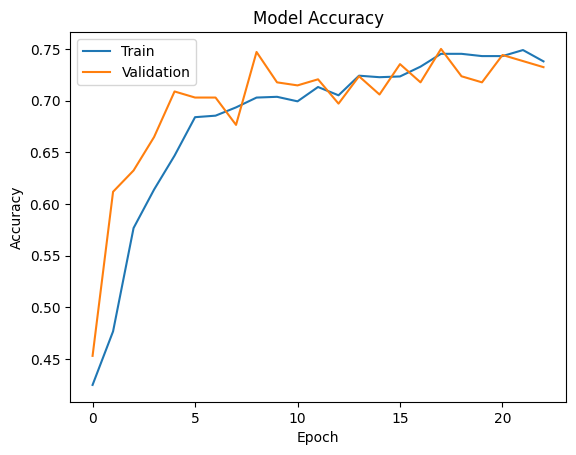

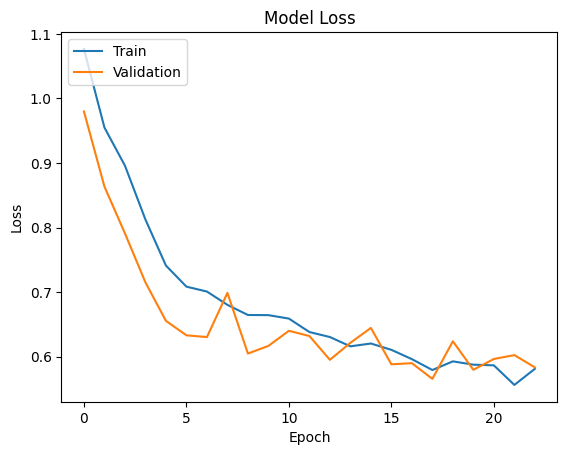

In [22]:
# Define image dimensions and batch size
img_height, img_width = 112, 112
batch_size = 32

# Define data directories
data_dir = "/content/AxialT2_left_l4_5_data_roi_112_clean"
train_dir = os.path.join(data_dir)
val_dir = os.path.join(data_dir)


# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2  # Set validation split
)

# Rescale validation data
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use categorical for multi-class
    subset='training',
    classes=['Normal', 'Moderate', 'Severe'] #Specify all three classes
)

# Create validation data generator
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=['Normal', 'Moderate', 'Severe'] #Specify all three classes
)

# Define the Dense CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.Dense(3, activation='softmax')  # Softmax for multi-class
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Binary cross-entropy loss
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping] # Add early stopping callback
)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The Denser model with more convolution layer perfored well and gave a trianing accuracy of 74.14% and a validation accuracy of 73.24%

### Residual Block Network


In [ ]:
from tensorflow.keras import layers, models

Found 1370 images belonging to 3 classes.
Found 340 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - accuracy: 0.4073 - loss: 6.1332 - val_accuracy: 0.5059 - val_loss: 1.0745
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 114ms/step - accuracy: 0.4612 - loss: 0.9866 - val_accuracy: 0.3618 - val_loss: 1.0780
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.4906 - loss: 0.9544 - val_accuracy: 0.2529 - val_loss: 1.1144
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.5190 - loss: 0.9240 - val_accuracy: 0.2382 - val_loss: 1.1337
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.5743 - loss: 0.8876 - val_accuracy: 0.2235 - val_loss: 1.1956
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - accuracy: 0.5739 - loss: 0.8596 - val_accuracy: 0.2235 - val_loss: 1.1804
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.5747 - loss: 0.8175 - val_accuracy: 0.2353 - val_loss: 1.0961
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.5614 - loss: 0.8315 - val_accuracy

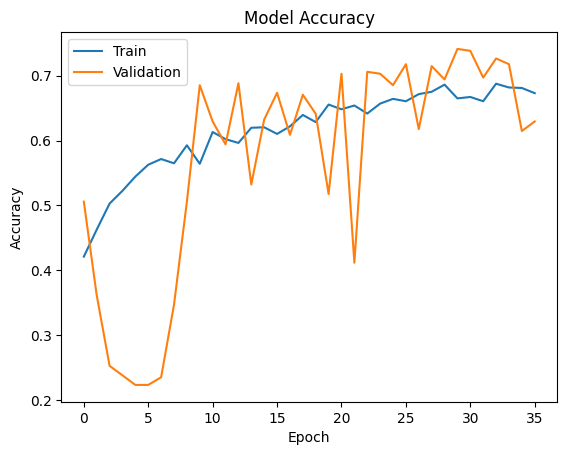

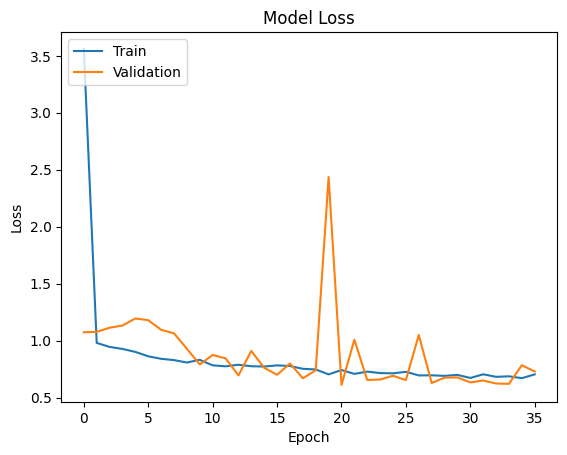

In [ ]:
# Define image dimensions and batch size
img_height, img_width = 112, 112
batch_size = 32

# Define data directories
data_dir = "/content/AxialT2_left_l4_5_data_roi_112_clean"
train_dir = os.path.join(data_dir)
val_dir = os.path.join(data_dir)

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

# Rescale validation data
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use categorical for multi-class
    subset='training',
    classes=['Normal', 'Moderate', 'Severe'] #Specify all three classes
)

# Create validation data generator
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=['Normal', 'Moderate', 'Severe'] #Specify all three classes
)

def residual_block(filters, input_shape):
    input_tensor = keras.Input(shape=input_shape)
    shortcut = input_tensor
    x = layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    shortcut = layers.Conv2D(filters, (1, 1), padding='same')(shortcut)
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return keras.Model(inputs=input_tensor, outputs=x)

# Define the CNN model with residual blocks
input_shape = (img_height, img_width, 3)
model_resnet = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    residual_block(32, (img_height // 2, img_width // 2, 32)),
    layers.MaxPooling2D((2, 2)),
    residual_block(64, (img_height // 4, img_width // 4, 32)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax') # 3 output units for 3 classes
])

# Compile the model
model_resnet.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model_resnet.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Residual model trained for 36 epochs and achived a training accuracy of 68.3% and validation accuracy of 62.94%

### Transfer Learning


I tried transfer learning ResNet50 to classify the data

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 23s 300ms/step - accuracy: 0.3720 - loss: 1.6354 - val_accuracy: 0.4500 - val_loss: 1.0533
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - accuracy: 0.4501 - loss: 1.0761 - val_accuracy: 0.3412 - val_loss: 1.1824
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.4316 - loss: 1.1379 - val_accuracy: 0.4265 - val_loss: 1.0171
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.4732 - loss: 1.0038 - val_accuracy: 0.4912 - val_loss: 1.0310
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.4785 - loss: 1.0206 - val_accuracy: 0.4647 - val_loss: 1.0205


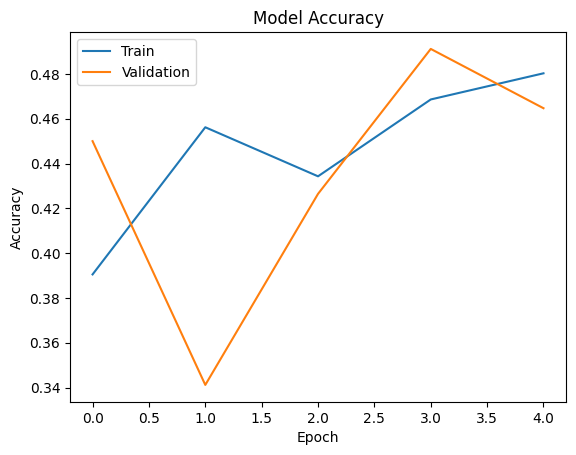

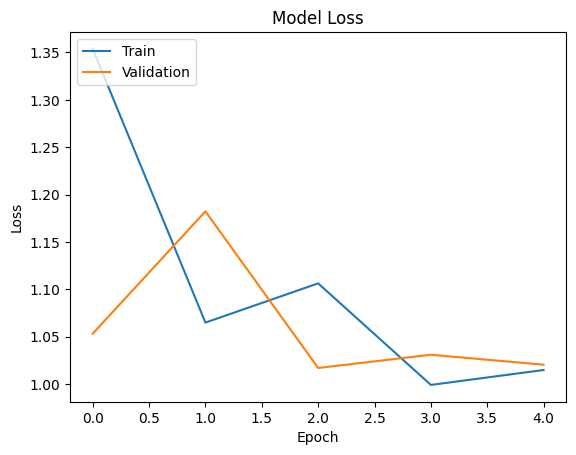

In [24]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load pre-trained ResNet50 without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Adjust the number of units as needed
predictions = Dense(3, activation='softmax')(x) # 3 output units for 3 classes

# Create the new model
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_transfer.fit(
    train_generator,
    epochs=10, # Start with a smaller number of epochs for transfer learning
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The model trained for 5 epochs gave 47% training accurcy and 46% validation accuracy